In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/MyDrive/sign_data/train"
test_dir="/content/drive/MyDrive/sign_data/test"

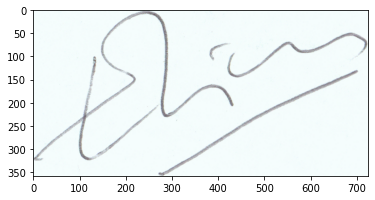

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/sign_data/train/001/001_01.PNG')
plt.imshow(img)

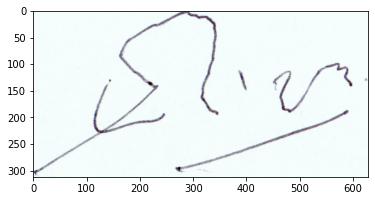

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/sign_data/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [ ]:
SIZE = 224

In [ ]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('/content/drive/MyDrive/sign_data/train/'):
    for data in glob.glob('/content/drive/MyDrive/sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (300,300))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('/content/drive/MyDrive/sign_data/test/'):
    for data in glob.glob('/content/drive/MyDrive/sign_data/test/'+per+'/*.*'):
   
    
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (300,300))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [ ]:
train_data.shape

(1649, 1, 300, 300, 3)

In [ ]:
train_data = train_data.reshape(-1, 300,300, 3)
test_data = test_data.reshape(-1, 300,300, 3)

In [ ]:
train_data.shape

(1649, 300, 300, 3)

In [ ]:
train_labels.shape

(1649, 2)

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [ ]:
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from tensorflow.keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300,300,3))
base_model.summary()

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(2, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]


EPOCHS = 20
BS = 64
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)

Epoch 1/20
19/19 [==============================] - 84s 3s/step - loss: 0.8182 - accuracy: 0.5390 - val_loss: 0.7046 - val_accuracy: 0.4545
Epoch 2/20
19/19 [==============================] - 34s 2s/step - loss: 0.6908 - accuracy: 0.5390 - val_loss: 0.6861 - val_accuracy: 0.5455
Epoch 3/20
19/19 [==============================] - 34s 2s/step - loss: 0.6846 - accuracy: 0.5347 - val_loss: 0.6821 - val_accuracy: 0.5717
Epoch 4/20
19/19 [==============================] - 33s 2s/step - loss: 0.6905 - accuracy: 0.5312 - val_loss: 0.6859 - val_accuracy: 0.5535
Epoch 5/20
19/19 [==============================] - 34s 2s/step - loss: 0.6792 - accuracy: 0.5841 - val_loss: 0.6740 - val_accuracy: 0.6202
Epoch 6/20
19/19 [==============================] - 34s 2s/step - loss: 0.6841 - accuracy: 0.5641 - val_loss: 0.6510 - val_accuracy: 0.6121
Epoch 7/20
19/19 [==============================] - 34s 2s/step - loss: 0.6513 - accuracy: 0.6655 - val_loss: 0.5991 - val_accuracy: 0.6747
Epoch 8/20
19/19 [==

<Figure size 432x288 with 0 Axes>

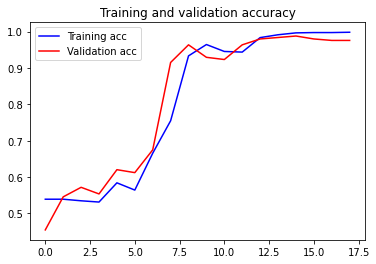

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

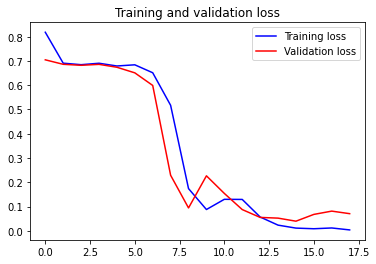

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
pred = model.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(pred,axis=1), test_labels)

1.0